<a href="https://colab.research.google.com/github/bvdsb01/mLearning/blob/main/DecisionTree-TitanicExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Prediction - Exercise - Decision Tree

Independent Variables = Pclass, Sex, Age, Fare

Dependent Variable = Survived

Model accuracy = 82.68%

In [42]:
import pandas as pd
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [43]:
inputs = df[['Pclass','Sex','Age','Fare']]
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [44]:
target = df['Survived']
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [45]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
inputs_n['Sex_n'] = le_sex.fit_transform(df['Sex'])
inputs_n

<ipython-input-45-ccffc94d6833>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs_n['Sex_n'] = le_sex.fit_transform(df['Sex'])


,Pclass,Age,Fare,Sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,28.0,23.4500,0
889,1,26.0,30.0000,1


In [47]:
inputs_n['Age'] = inputs_n['Age'].fillna(inputs['Age'].mean())
inputs_n

<ipython-input-47-1c4b6bb16035>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs_n['Age'] = inputs_n['Age'].fillna(inputs['Age'].mean())


,Pclass,Age,Fare,Sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,28.0,23.4500,0
889,1,26.0,30.0000,1


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, test_size = 0.2)
X_train

,Pclass,Age,Fare,Sex_n
50,3,7.0,39.6875,1
294,3,24.0,7.8958,1
217,2,42.0,27.0000,1
702,3,18.0,14.4542,0
298,1,28.0,30.5000,1
...,...,...,...,...
253,3,30.0,16.1000,1
146,3,27.0,7.7958,1
153,3,40.5,14.5000,1
609,1,40.0,153.4625,0


In [49]:
X_test

,Pclass,Age,Fare,Sex_n
398,2,23.0,10.5000,1
145,2,19.0,36.7500,1
758,3,34.0,8.0500,1
441,3,20.0,9.5000,1
187,1,45.0,26.5500,1
...,...,...,...,...
67,3,19.0,8.1583,1
551,2,27.0,26.0000,1
438,1,64.0,263.0000,1
455,3,29.0,7.8958,1


In [50]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [51]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
model.score(X_test, y_test)

0.8268156424581006

In [59]:
y_predicted = model.predict(X_test)
y_predicted

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0])

In [54]:
y_test

398    0
145    0
758    0
441    0
187    1
      ..
67     0
551    0
438    0
455    1
450    0
Name: Survived, Length: 179, dtype: int64

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[94, 12],
       [19, 54]])

Text(70.72222222222221, 0.5, 'Truth')

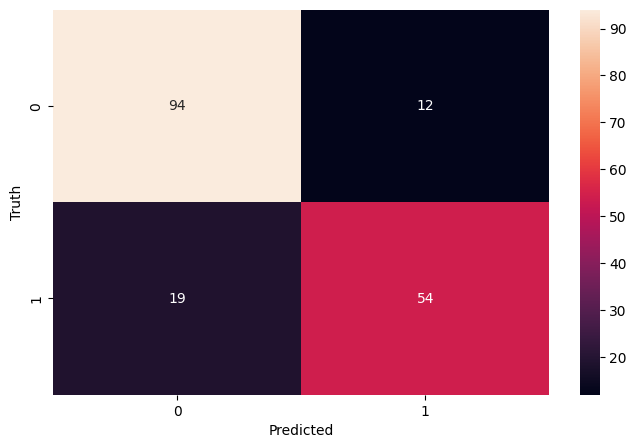

In [62]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize = (8,5))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')